In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [11]:
# Load the dataset
df = pd.read_csv('KeepItSimple.csv')

# Display column names
columns = df.columns.tolist()

# Checking dataset information
dataset_info = df.info()

# Displaying the first few rows to understand the structure
preview = df.head()

columns, dataset_info, preview


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   prompt_id                 1900 non-null   int64  
 1   overall_diag_main         1900 non-null   int64  
 2   Dem_Sev                   402 non-null    object 
 3   age                       1900 non-null   int64  
 4   mmsetotal                 1900 non-null   int64  
 5   moca_total                1900 non-null   int64  
 6   education_level           1900 non-null   int64  
 7   education_years           1900 non-null   float64
 8   smoking                   1900 non-null   int64  
 9   alcohol                   1900 non-null   int64  
 10  moca_visuoexec            1900 non-null   int64  
 11  moca_naming               1900 non-null   int64  
 12  moca_attndigitlist        1900 non-null   int64  
 13  moca_attnletterlist       1900 non-null   int64  
 14  moca_att

(['prompt_id',
  'overall_diag_main',
  'Dem_Sev',
  'age',
  'mmsetotal',
  'moca_total',
  'education_level',
  'education_years',
  'smoking',
  'alcohol',
  'moca_visuoexec',
  'moca_naming',
  'moca_attndigitlist',
  'moca_attnletterlist',
  'moca_attnserialseven',
  'moca_langrepeat',
  'moca_langfluency',
  'moca_abstraction',
  'moca_delayrecall',
  'moca_orientation',
  'moca_educationlevel',
  'orientdate',
  'orientlocat',
  'mmseregobjects',
  'regattempts',
  'attention_registration',
  'recall',
  'langpoint',
  'langspeech',
  'langcommand',
  'langread',
  'langwrite',
  'langcopy',
  'educationlevel_mmse',
  'Combined_Normalized_IADL',
  '5_categories'],
 None,
    prompt_id  overall_diag_main   Dem_Sev  age  mmsetotal  moca_total  \
 0          1                  2       NaN   85         30          22   
 1          2                  2       NaN   68         27          26   
 2          3                  2       NaN   82         28          23   
 3          4    

In [12]:
# Drop 'prompt_id', 'overall_diag_main', and 'Dem_Sev'
df = df.drop(['prompt_id', 'overall_diag_main', 'Dem_Sev'], axis=1)

# Exclude rows where '5_categories' is missing
df = df[df['5_categories'].notna()]

# Check the updated dataset structure
updated_shape = df.shape
updated_columns = df.columns.tolist()

updated_shape, updated_columns



((1258, 33),
 ['age',
  'mmsetotal',
  'moca_total',
  'education_level',
  'education_years',
  'smoking',
  'alcohol',
  'moca_visuoexec',
  'moca_naming',
  'moca_attndigitlist',
  'moca_attnletterlist',
  'moca_attnserialseven',
  'moca_langrepeat',
  'moca_langfluency',
  'moca_abstraction',
  'moca_delayrecall',
  'moca_orientation',
  'moca_educationlevel',
  'orientdate',
  'orientlocat',
  'mmseregobjects',
  'regattempts',
  'attention_registration',
  'recall',
  'langpoint',
  'langspeech',
  'langcommand',
  'langread',
  'langwrite',
  'langcopy',
  'educationlevel_mmse',
  'Combined_Normalized_IADL',
  '5_categories'])

In [13]:
from sklearn.impute import SimpleImputer

# Identify numerical columns for median imputation
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('5_categories')  # Exclude the target variable

# Apply median imputation
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Verify missing values after imputation
missing_values_after_imputation = df.isna().sum()
missing_values_after_imputation



age                         0
mmsetotal                   0
moca_total                  0
education_level             0
education_years             0
smoking                     0
alcohol                     0
moca_visuoexec              0
moca_naming                 0
moca_attndigitlist          0
moca_attnletterlist         0
moca_attnserialseven        0
moca_langrepeat             0
moca_langfluency            0
moca_abstraction            0
moca_delayrecall            0
moca_orientation            0
moca_educationlevel         0
orientdate                  0
orientlocat                 0
mmseregobjects              0
regattempts                 0
attention_registration      0
recall                      0
langpoint                   0
langspeech                  0
langcommand                 0
langread                    0
langwrite                   0
langcopy                    0
educationlevel_mmse         0
Combined_Normalized_IADL    0
5_categories                0
dtype: int

In [14]:
# Define the target variable ('5_categories') and features
y = df['5_categories']
X = df.drop(['5_categories'], axis=1)

# Verify the shapes of X and y
X_shape = X.shape
y_shape = y.shape

X_shape, y_shape



((1258, 32), (1258,))

In [22]:
from sklearn.preprocessing import StandardScaler

# Apply scaling to numerical columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Verify the shapes of the split datasets
train_shape = X_train.shape
test_shape = X_test.shape

train_shape, test_shape


((880, 32), (378, 32))

In [23]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial')

In [25]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean()}")


Cross-validation scores: [0.62301587 0.61111111 0.62301587 0.58565737 0.67330677]
Mean accuracy: 0.6232214001138303


In [26]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [1000, 2000]
}

# Perform grid search
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', class_weight='balanced'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")


/home/gavin.thomas/software/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gavin.thomas/software/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gavin.thomas/software/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gavin.thomas/software/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gavin.thomas/software/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  

Best parameters: {'C': 0.1, 'max_iter': 1000, 'solver': 'saga'}


In [27]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate using confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

conf_matrix, class_report


(array([[ 54,  11,   0,   1,   0],
        [ 46, 105,  30,  10,   1],
        [  6,  21,  43,   2,   0],
        [  0,   0,   7,  28,   1],
        [  0,   0,   0,   2,  10]]),
 '              precision    recall  f1-score   support\n\n         1.0       0.51      0.82      0.63        66\n         2.0       0.77      0.55      0.64       192\n         3.0       0.54      0.60      0.57        72\n         4.0       0.65      0.78      0.71        36\n         5.0       0.83      0.83      0.83        12\n\n    accuracy                           0.63       378\n   macro avg       0.66      0.71      0.67       378\nweighted avg       0.67      0.63      0.64       378\n')

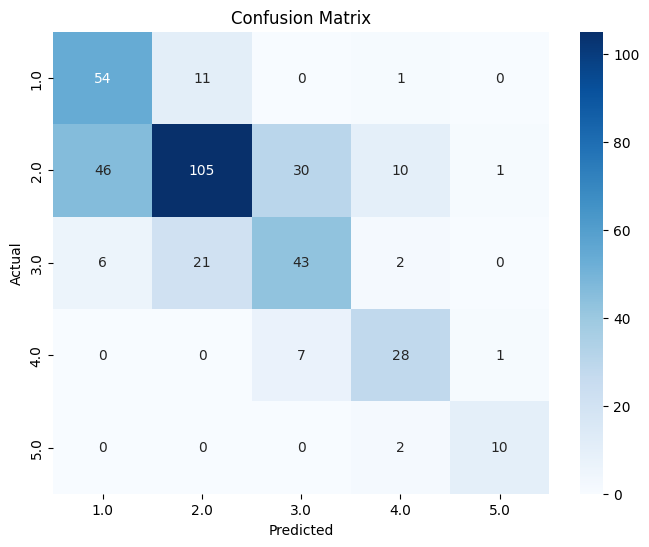

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


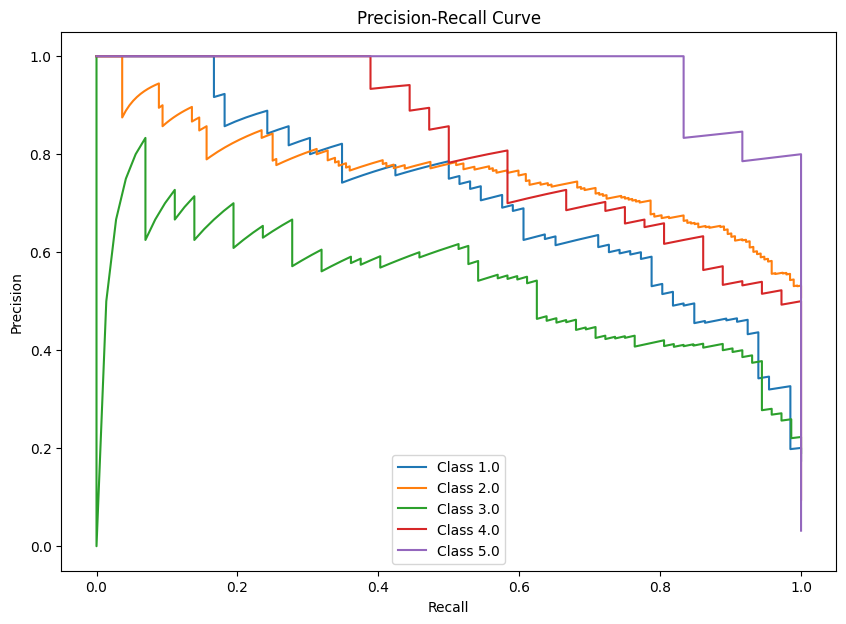

In [29]:
from sklearn.metrics import precision_recall_curve

# Generate precision-recall curves for each class
plt.figure(figsize=(10, 7))
for i, class_label in enumerate(model.classes_):
    precision, recall, _ = precision_recall_curve((y_test == class_label).astype(int), model.predict_proba(X_test)[:, i])
    plt.plot(recall, precision, label=f'Class {class_label}')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


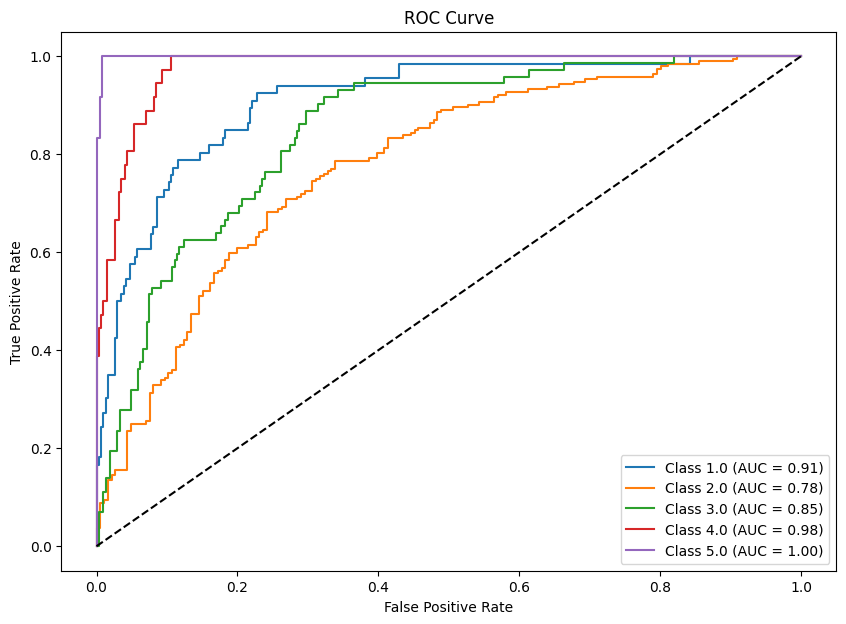

In [30]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the target labels for multi-class ROC
y_test_binarized = label_binarize(y_test, classes=model.classes_)

plt.figure(figsize=(10, 7))
for i, class_label in enumerate(model.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], model.predict_proba(X_test)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


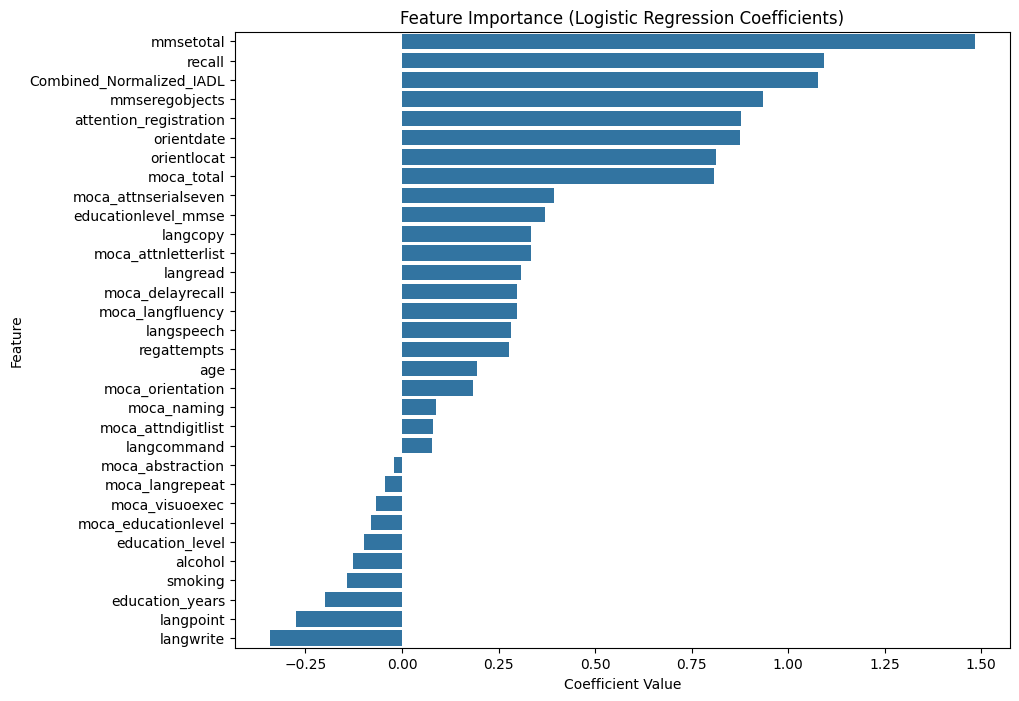

In [31]:
# Get feature coefficients from the trained logistic regression model
coefficients = model.coef_[0]
feature_names = X_train.columns

# Create a DataFrame for visualization
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


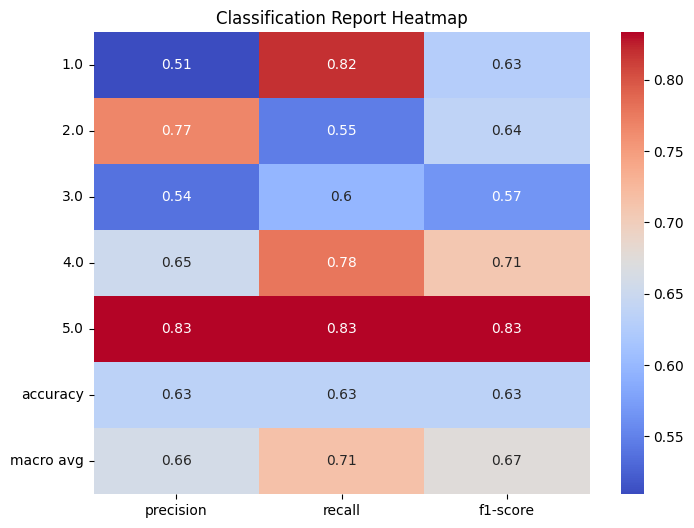

In [32]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report
class_report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame for visualization
class_report_df = pd.DataFrame(class_report_dict).transpose()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(class_report_df.iloc[:-1, :-1], annot=True, cmap='coolwarm')
plt.title('Classification Report Heatmap')
plt.show()


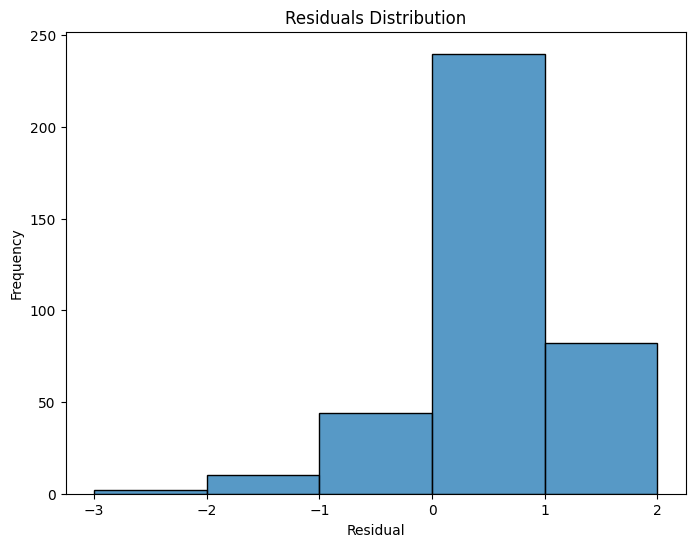

In [33]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=False, bins=len(model.classes_))
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()


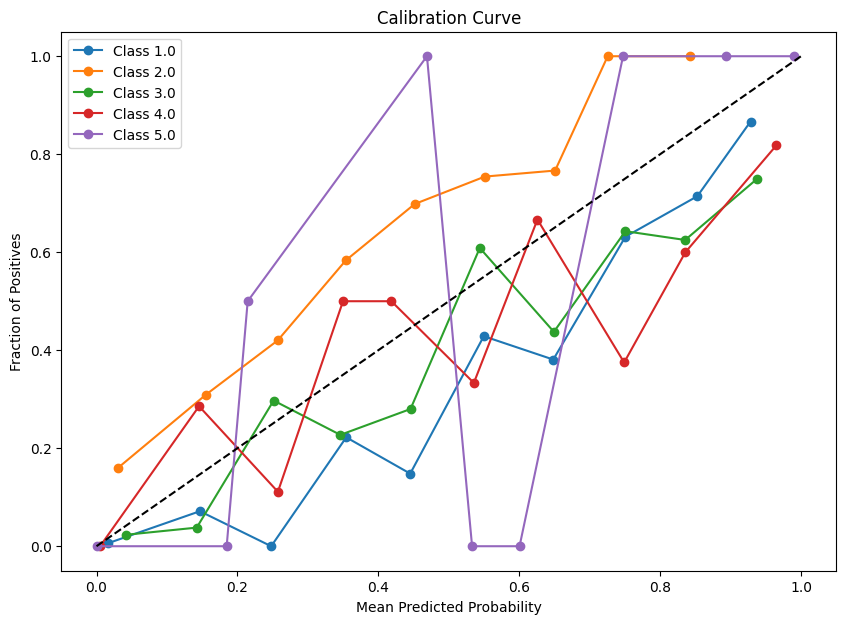

In [34]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(10, 7))
for i, class_label in enumerate(model.classes_):
    prob_true, prob_pred = calibration_curve((y_test == class_label).astype(int), model.predict_proba(X_test)[:, i], n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=f'Class {class_label}')

plt.plot([0, 1], [0, 1], 'k--')  # Perfectly calibrated line
plt.title('Calibration Curve')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.show()


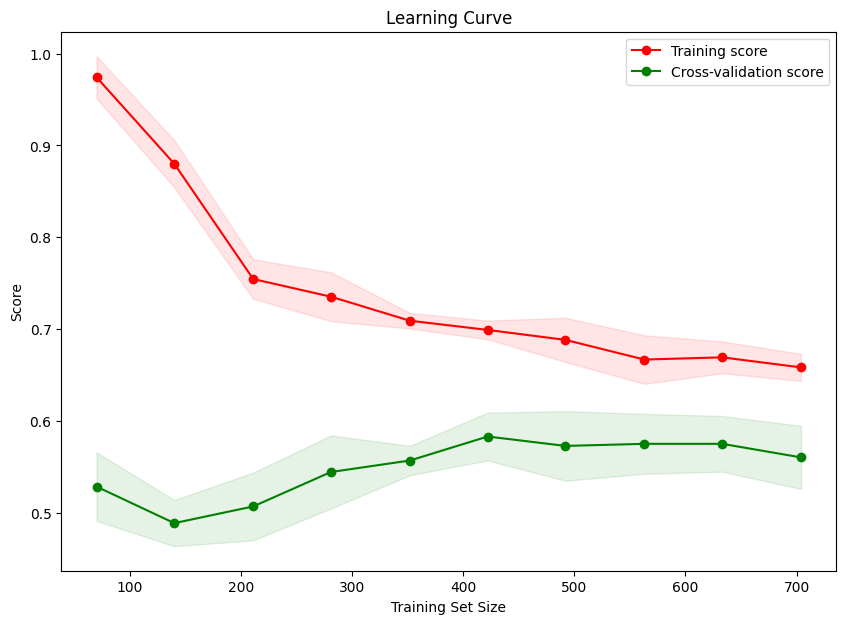

In [35]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 7))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


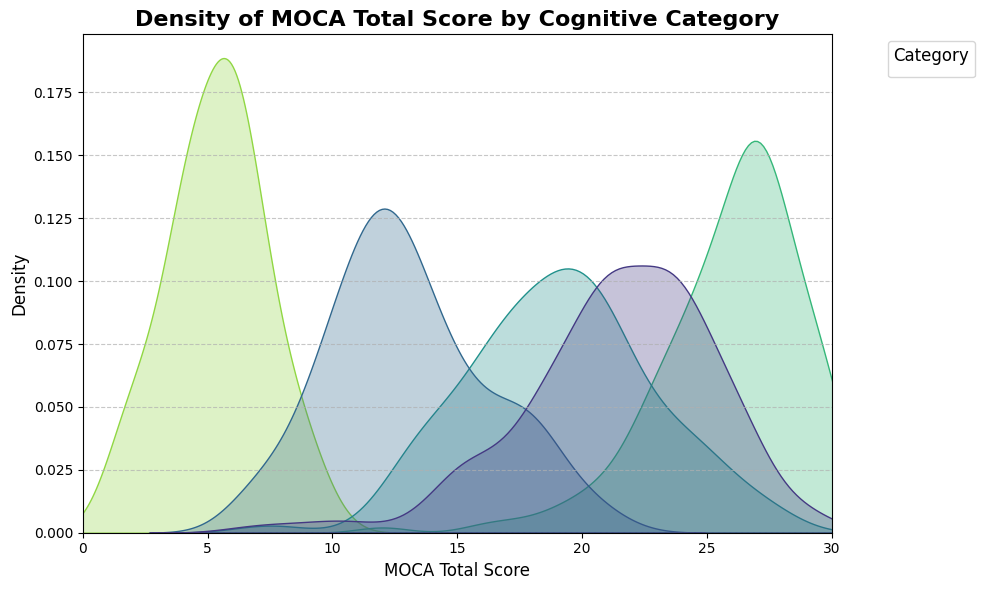

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


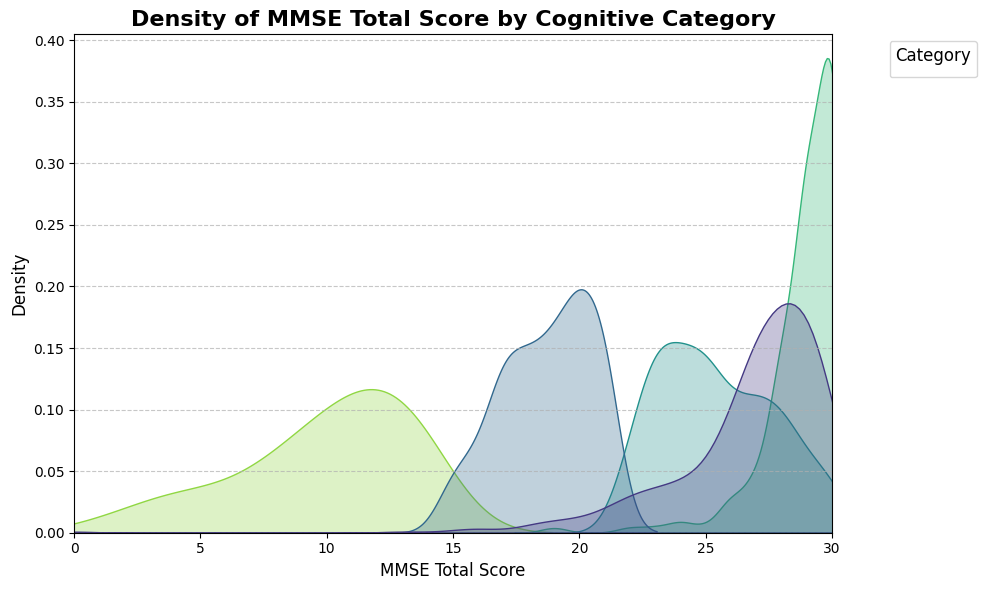

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


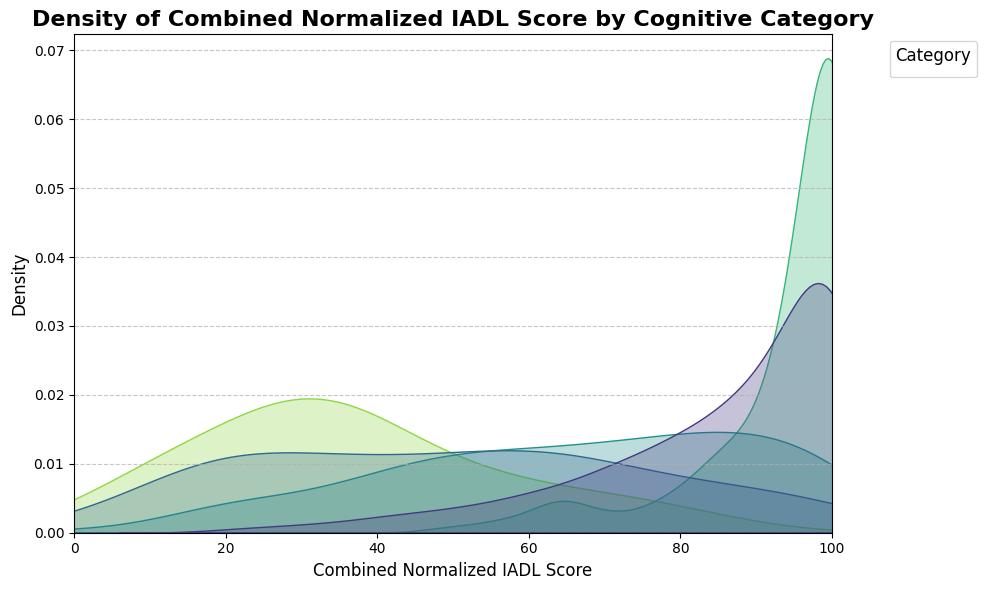

In [40]:
# Load the new CSV file
df = pd.read_csv('MERGED_ANALYSIS.csv')

# Map for categories to professional labels
category_labels = {
    1: "Normal Cognition",
    2: "MCI",
    3: "Mild Dementia",
    4: "Moderate Dementia",
    5: "Severe Dementia"
}

# Replace numerical categories with their labels for better readability
df['5_categories_labeled'] = df['5_categories'].map(category_labels)

# Define a function for plotting density plots while skipping NaN values
def plot_density_with_legend_skip_nan(feature, xlabel, xlim, title):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(
        data=df,
        x=feature,
        hue='5_categories_labeled',
        common_norm=False,
        fill=True,
        alpha=0.3,
        palette='viridis'
    )
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.xlim(xlim)
    legend = plt.legend(
        title="Category", 
        fontsize=10, 
        title_fontsize=12, 
        loc='upper right', 
        bbox_to_anchor=(1.2, 1)
    )
    legend.set_frame_on(True)  # Add a frame around the legend for clarity
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot 1: MOCA Total Score
plot_density_with_legend_skip_nan(
    feature='moca_total',
    xlabel='MOCA Total Score',
    xlim=(0, 30),
    title='Density of MOCA Total Score by Cognitive Category'
)

# Plot 2: MMSE Total Score
plot_density_with_legend_skip_nan(
    feature='mmsetotal',
    xlabel='MMSE Total Score',
    xlim=(0, 30),
    title='Density of MMSE Total Score by Cognitive Category'
)

# Plot 3: Combined Normalized IADL
plot_density_with_legend_skip_nan(
    feature='Combined_Normalized_IADL',
    xlabel='Combined Normalized IADL Score',
    xlim=(0, 100),
    title='Density of Combined Normalized IADL Score by Cognitive Category'
)
